<a href="https://colab.research.google.com/github/KaveeshwaraBandara/EN3160/blob/main/EN3160_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Question 1

In [ ]:
# Import Q1 image
Q1_IMAGE = cv.imread('/content/drive/MyDrive/EN3160/a1images/emma.jpg', cv.IMREAD_GRAYSCALE)
assert Q1_IMAGE is not None

In [ ]:
def piecewise_transform():
    t1 = np.linspace(0, 50, num=51).astype('uint8')
    t2 = np.linspace(100, 255, num=100).astype('uint8')
    t3 = np.linspace(150, 255, num=105).astype('uint8')

    t = np.concatenate((t1, t2, t3), axis=0).astype('uint8')
    return t

In [ ]:
transform = piecewise_transform()

(256,)


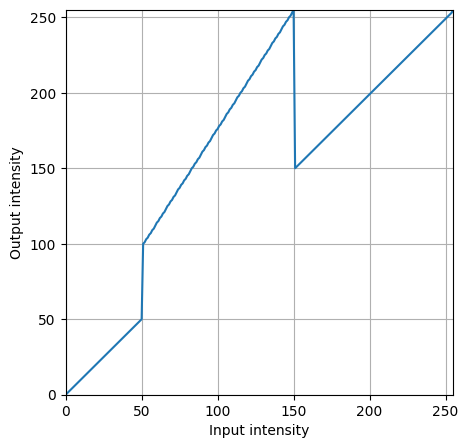

In [ ]:
# Plot the array
plt.figure(figsize=(5, 5))
plt.plot(transform)
plt.xlabel("Input intensity")
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.ylabel("Output intensity")
plt.grid(True)
plt.show()

#####transform the image numpy array according to the above function(we don't need to write loop to itereate over the array because numpy handles it)

In [ ]:
proc_q1_img = transform[Q1_IMAGE]

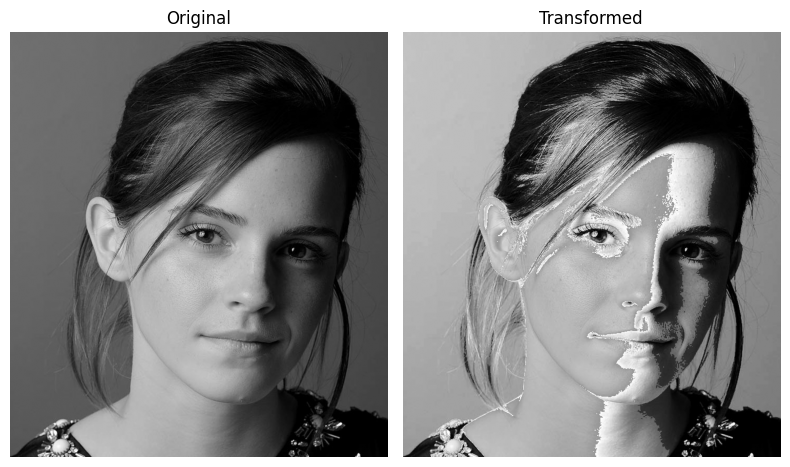

In [ ]:
#plot original and transformed images
fig, ax = plt.subplots(1, 2, figsize=(8, 6))
ax[0].imshow(Q1_IMAGE, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(proc_q1_img, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Transformed')
ax[1].axis("off")

plt.tight_layout()
plt.show()

## Question 2

In [ ]:
# Import Q2 image
Q2_IMAGE = cv.imread('/content/drive/MyDrive/EN3160/a1images/brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert Q2_IMAGE is not None

In [ ]:
def accentuate_range_gaussian(image, mu, sigma, scale=255):
    # Create lookup table using Gaussian
    x = np.arange(256)
    transform = scale * np.exp(-((x - mu) ** 2) / (2 * sigma ** 2))
    transform = np.clip(transform, 0, 255).astype(np.uint8)

    # Apply transformation
    return transform[image]

In [ ]:
white_matter = accentuate_range_gaussian(Q2_IMAGE, mu=150, sigma=20)
gray_matter = accentuate_range_gaussian(Q2_IMAGE, mu=200, sigma=15)

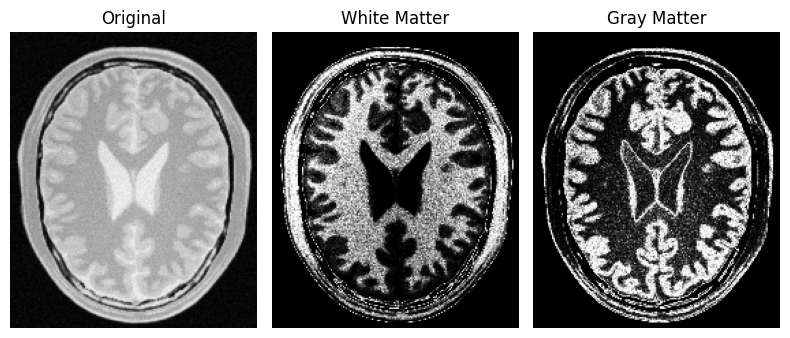

In [ ]:
#plot original white matter and gray matter
fig, ax = plt.subplots(1, 3, figsize=(8, 6))
ax[0].imshow(Q2_IMAGE, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis("off")
ax[1].imshow(white_matter, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('White Matter')
ax[1].axis("off")
ax[2].imshow(gray_matter, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gray Matter')
ax[2].axis("off")

plt.tight_layout()
plt.show()

##Question 3

In [ ]:
# Import Q3 image
imq3_bgr = cv.imread('/content/drive/MyDrive/EN3160/a1images/highlights_and_shadows.jpg')
assert imq3_bgr is not None

In [ ]:
# Assuming imq3_bgr is your input BGR image loaded via OpenCV

# Convert color spaces
imq3_lab = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2LAB)
imq3_rgb = cv.cvtColor(imq3_bgr, cv.COLOR_BGR2RGB)

# Split LAB channels
L, a, b = cv.split(imq3_lab)

# Gamma value
gamma = 0.75

# Create LUT using vectorized operation
t = np.array((np.arange(256) / 255.0) ** gamma * 255, dtype='uint8')

# Apply LUT to L channel
L_modified = cv.LUT(L, t)

# Merge channels and convert back to RGB
merged = cv.merge([L_modified, a, b])
imq3_modified = cv.cvtColor(merged, cv.COLOR_LAB2RGB)

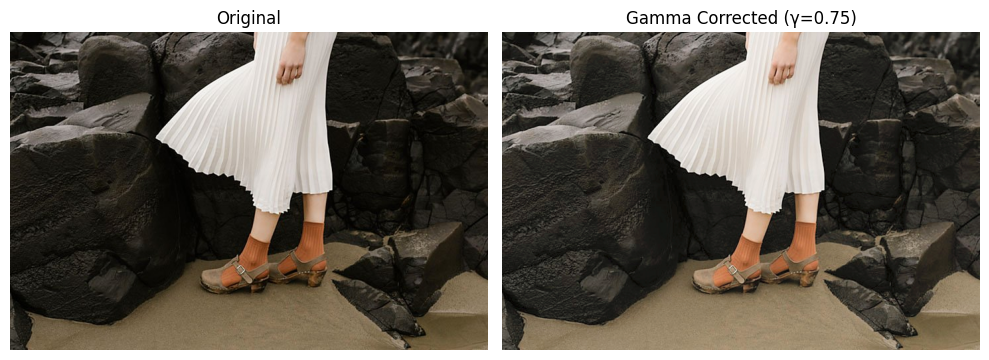

In [ ]:
# Plot images
fig, axs = plt.subplots(1, 2, figsize=(10, 6))
axs[0].imshow(imq3_rgb)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(imq3_modified)
axs[1].set_title(f'Gamma Corrected (γ={gamma})')
axs[1].axis('off')
plt.tight_layout()
plt.show()

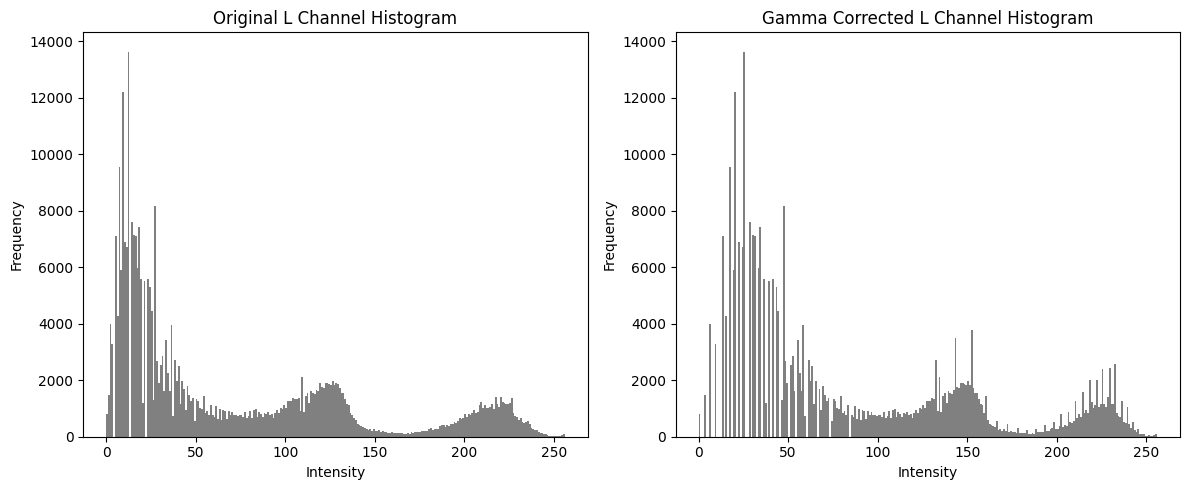

In [ ]:
# Plot histograms for L channel
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Original L Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(L_modified.ravel(), bins=256, range=(0, 256), color='gray')
plt.title('Gamma Corrected L Channel Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

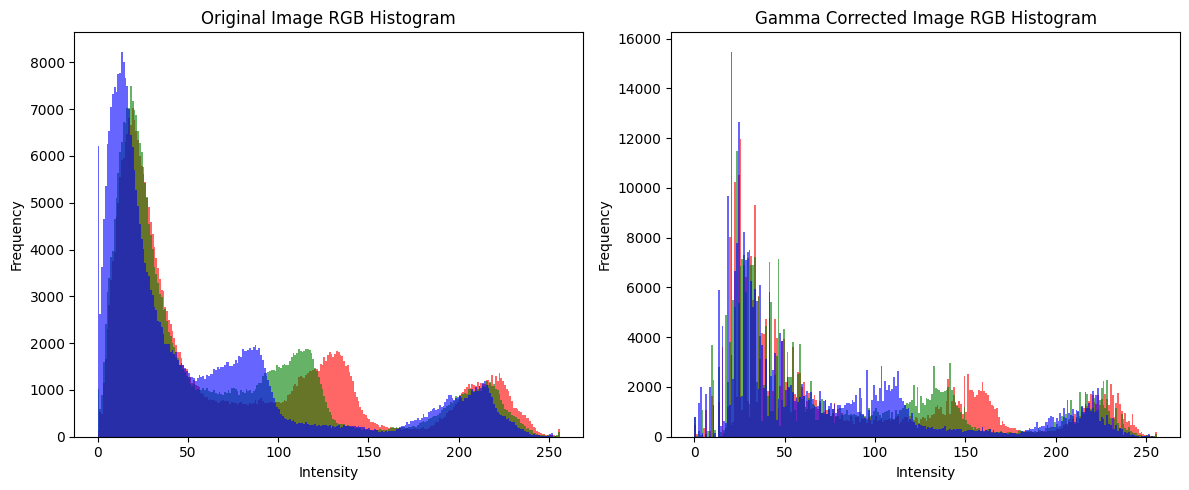

In [ ]:
# Plot RGB histograms
colors = ('r', 'g', 'b')
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
for i, col in enumerate(colors):
    plt.hist(imq3_rgb[:, :, i].ravel(), bins=256, range=(0, 256), color=col, alpha=0.6)
plt.title('Original Image RGB Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
for i, col in enumerate(colors):
    plt.hist(imq3_modified[:, :, i].ravel(), bins=256, range=(0, 256), color=col, alpha=0.6)
plt.title('Gamma Corrected Image RGB Histogram')
plt.xlabel('Intensity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##Question 4

In [ ]:
# Import Q4 image
Q4_bgr = cv.imread('/content/drive/MyDrive/EN3160/a1images/spider.png')
assert Q4_bgr is not None

In [ ]:
Q4_HSV = cv.cvtColor(Q4_bgr, cv.COLOR_BGR2HSV)

In [ ]:
# Split in to hue, saturation and value planes
Hue, Saturation, Value = cv.split(Q4_HSV)

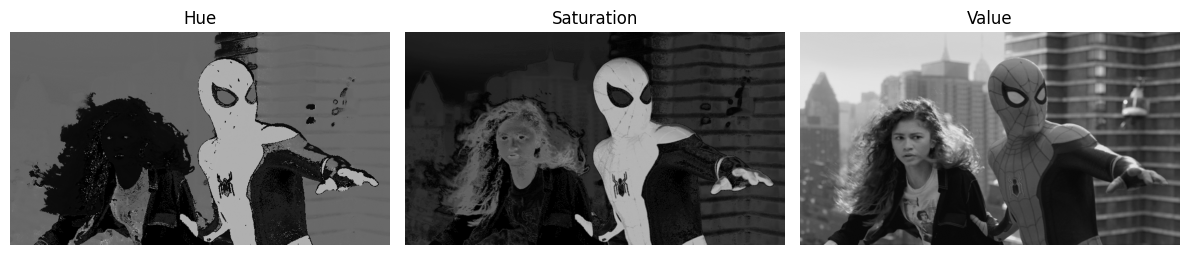

In [ ]:
# PLot
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(Hue, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(Saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(Value, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
def gaussian_transform(a=0.6, sigma=70.0, center=128):
    x = np.arange(256)
    gaussian = a * 128 * np.exp(-((x - center) ** 2) / (2 * sigma ** 2))
    f = np.minimum(x + gaussian, 255).astype(np.uint8)
    return x, f

In [ ]:
# Get LUT and input intensities
x, f = gaussian_transform(a=0.7, sigma=70)

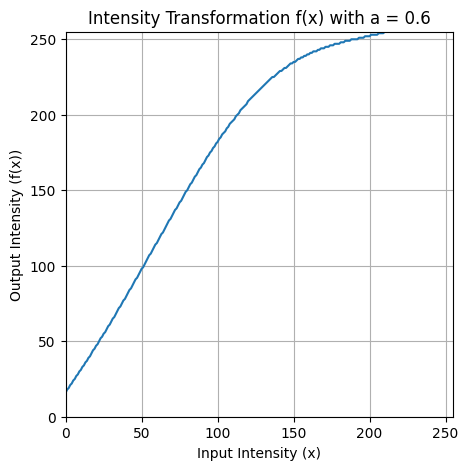

In [ ]:
plt.figure(figsize=(5, 5))
plt.plot(x, f)
plt.title('Intensity Transformation f(x) with a = 0.6')
plt.xlabel('Input Intensity (x)')
plt.ylabel('Output Intensity (f(x))')
plt.grid(True)
plt.xlim([0, 255])
plt.ylim([0, 255])
plt.show()

In [ ]:
# Apply transformation as mentioned in part b (to saturation plane)
Saturation_transformed = cv.LUT(Saturation, f)

In [ ]:
# Merge
merged = cv.merge([Hue, Saturation_transformed, Value])
transformed_im = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

In [ ]:
Q4_rgb = cv.cvtColor(Q4_bgr, cv.COLOR_BGR2RGB)

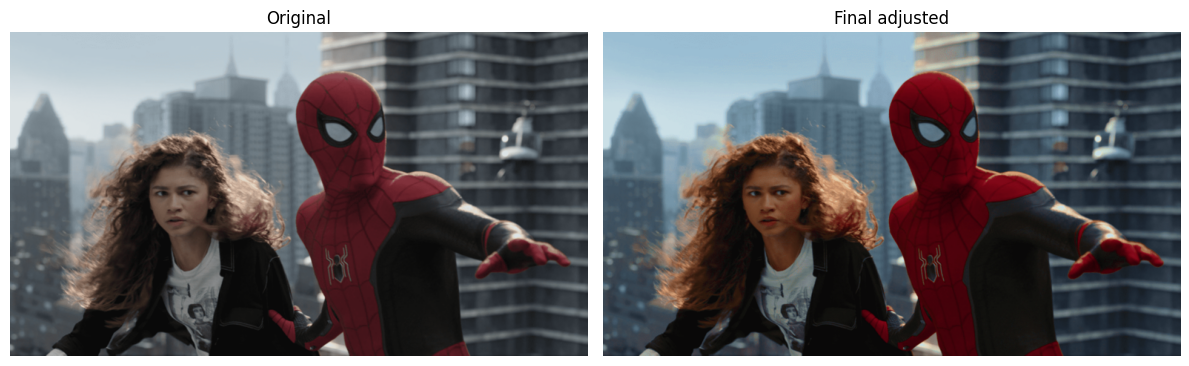

In [ ]:
#plot the images
fig, axs = plt.subplots(1, 2, figsize=(12, 8))
axs[0].imshow(Q4_rgb)
axs[0].set_title('Original')
axs[0].axis('off')
axs[1].imshow(transformed_im)
axs[1].set_title('Final adjusted')
axs[1].axis('off')

plt.tight_layout()
plt.show()

##Question 5

In [ ]:
# Import Q5 image
Q5_img = cv.imread('/content/drive/MyDrive/EN3160/a1images/shells.tif', cv.IMREAD_GRAYSCALE)
assert Q5_img is not None

In [ ]:
def histogram_equalization(img):
    L = 256
    M, N = img.shape

    # Calculate histogram
    hist = cv.calcHist([img], [0], None, [L], [0, L]).flatten()

    # Compute cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize CDF to [0, L-1]
    cdf_normalized = ((L - 1) * cdf / (M * N)).astype('uint8')

    # Map original image pixels through the normalized CDF (LUT)
    equalized_img = cdf_normalized[img]

    return equalized_img


In [ ]:
equalized = histogram_equalization(Q5_img)

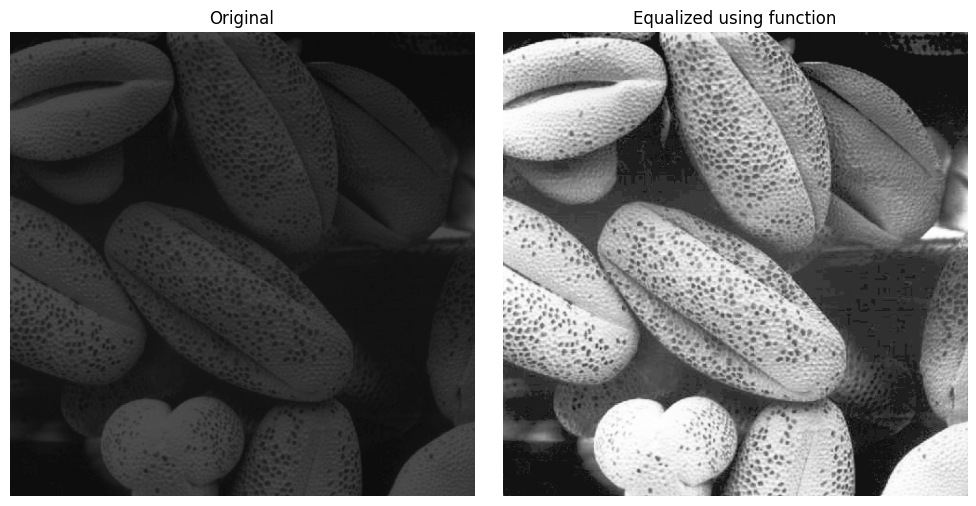

In [ ]:
# Plot original and equalized images
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(Q5_img, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(equalized, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Equalized using function')
ax[1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Compute histograms
hist1 = cv.calcHist([Q5_img], [0], None, [256], [0, 256])
hist2 = cv.calcHist([equalized], [0], None, [256], [0, 256])

img_flat = Q5_img.flatten()
equalized_flat = equalized.flatten()

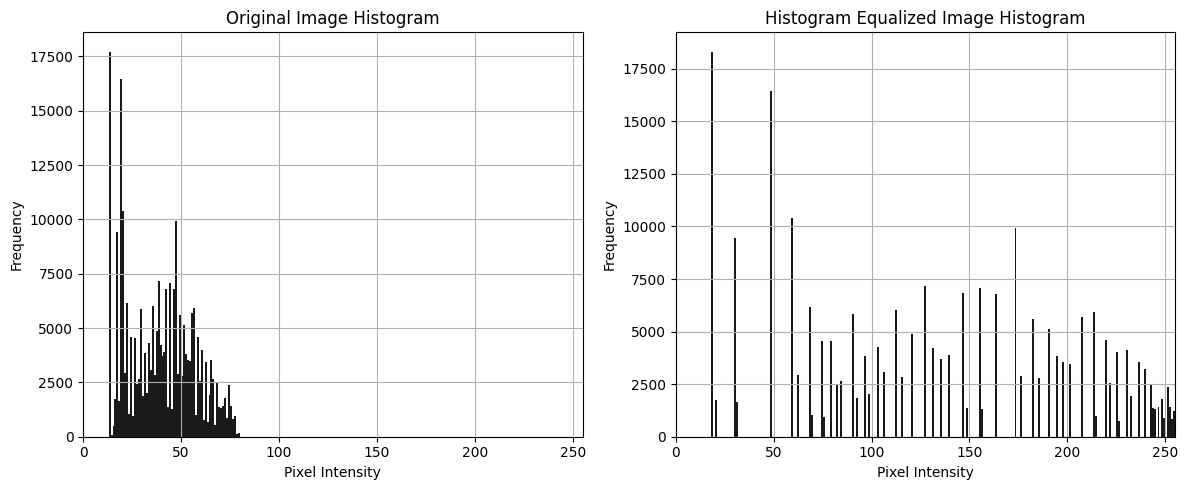

In [ ]:
# Plot histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(img_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Original Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.subplot(1, 2, 2)
plt.hist(equalized_flat, bins=256, range=(0, 256), color='black', alpha=0.9)
plt.title('Histogram Equalized Image Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.grid(True)

plt.tight_layout()
plt.show()

##Question 6

In [ ]:
# Import Q6 image
Q6_img = cv.imread('/content/drive/MyDrive/EN3160/a1images/jeniffer.jpg')
assert Q6_img is not None

In [ ]:
Q6_hsv = cv.cvtColor(Q6_img, cv.COLOR_BGR2HSV)

In [ ]:
Hue, Saturation, Value = cv.split(Q6_hsv)

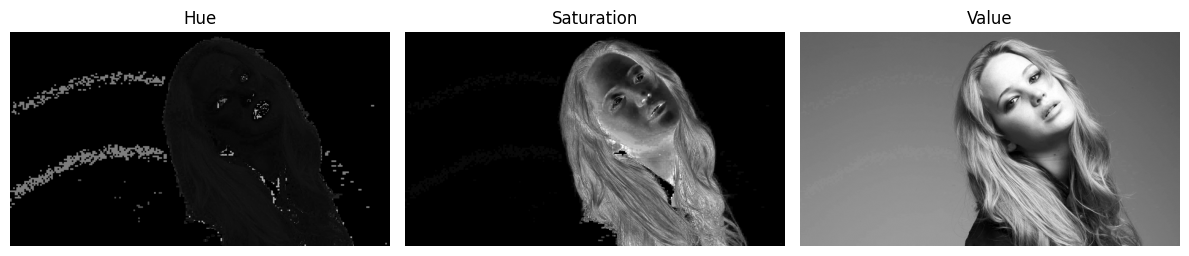

In [ ]:
# plot images
fig, ax = plt.subplots(1, 3, figsize=(12, 8))

ax[0].imshow(Hue, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue')
ax[0].axis("off")
ax[1].imshow(Saturation, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation')
ax[1].axis("off")
ax[2].imshow(Value, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value')
ax[2].axis("off")

plt.tight_layout()
plt.show()

In [ ]:
# Thresholding on Saturation channel
_, mask = cv.threshold(Saturation, 12, 255, cv.THRESH_BINARY)

# Extract foreground using the mask
foreground = cv.bitwise_and(Q6_img, Q6_img, mask=mask)

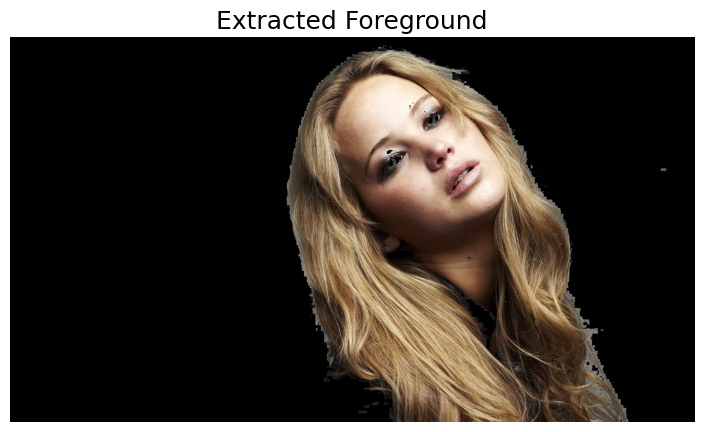

In [ ]:
# plot
plt.figure(figsize=(10, 5))
plt.imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
plt.title('Extracted Foreground', fontsize=18)
plt.axis('off')
plt.show()

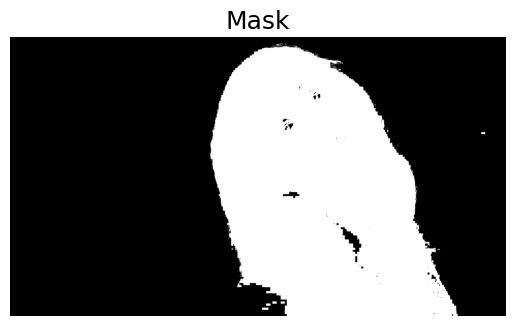

In [ ]:
plt.imshow(mask, cmap='gray')
plt.title('Mask', fontsize=18)
plt.axis('off')
plt.show()

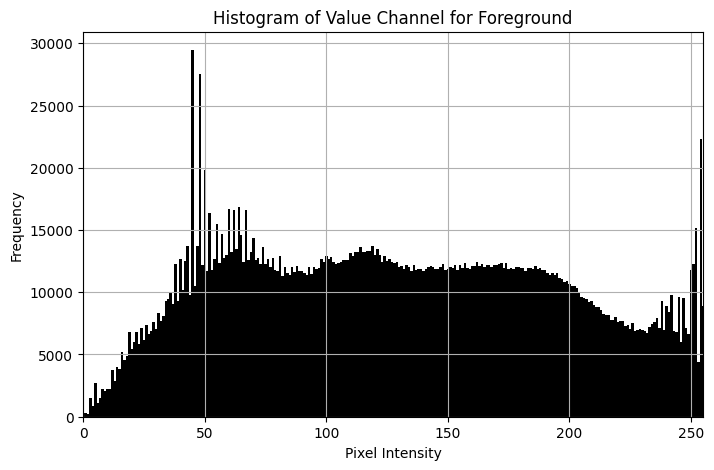

In [ ]:
# Convert foreground to HSV and split channels
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
H_fg, S_fg, V_fg = cv.split(foreground_hsv)

# Calculate histogram of the Value channel within the mask
hist = cv.calcHist([V_fg], [0], mask, [256], [0, 256])

# Create x positions for bars
x_positions = np.arange(len(hist))

# Plot histogram as bar plot
plt.figure(figsize=(8, 5))
plt.bar(x_positions, hist.flatten(), color='black', width=1)
plt.title('Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.grid(True)
plt.show()

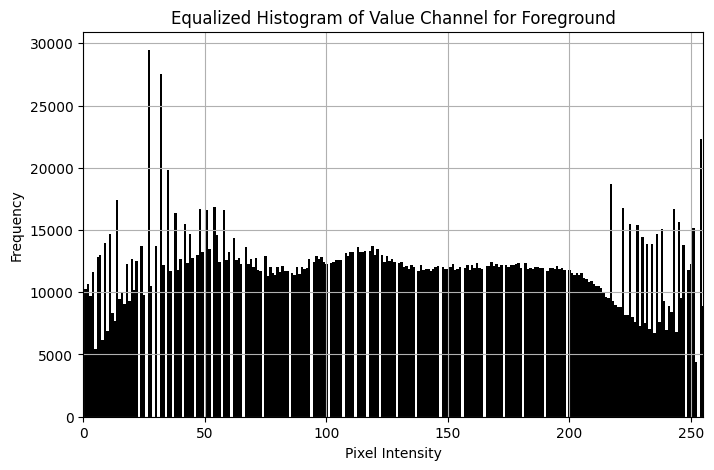

In [ ]:
# Compute histogram of V_fg using mask
hist = cv.calcHist([V_fg], [0], mask, [256], [0, 256]).flatten()

# Compute cumulative distribution function (CDF)
cdf = hist.cumsum()

# Number of pixels in mask
pixels = cdf[-1]

# Avoid division by zero (in case pixels=0)
if pixels == 0:
    raise ValueError("Mask has zero pixels selected.")

# Define transformation LUT (normalized CDF scaled to [0,255])
t = ((255) * cdf / pixels).astype('uint8')

# Apply LUT to equalize V channel
V_modified = t[V_fg]

# Calculate histogram of equalized V channel within mask
hist_eq = cv.calcHist([V_modified], [0], mask, [256], [0, 256])

# Plot histogram of equalized Value channel
x_positions = np.arange(len(hist_eq))

plt.figure(figsize=(8, 5))
plt.bar(x_positions, hist_eq.flatten(), color='black', width=1)
plt.title('Equalized Histogram of Value Channel for Foreground')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.xlim([0, 255])
plt.grid(True)
plt.show()

In [124]:
# Merge modified ones
merged = cv.merge([H_fg, S_fg, V_modified])
foreground_modified = cv.cvtColor(merged, cv.COLOR_HSV2RGB)

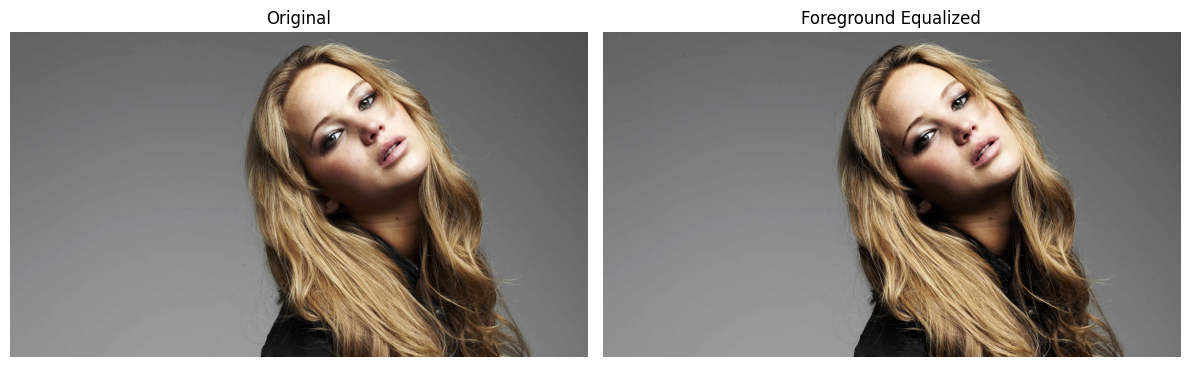

In [126]:
# Extract background in BGR
background = cv.bitwise_and(Q6_img, Q6_img, mask=cv.bitwise_not(mask))

# Convert background to RGB for matplotlib compatibility
background_rgb = cv.cvtColor(background, cv.COLOR_BGR2RGB)

# Combine background and modified foreground using numpy where mask is 255
# mask needs to be single channel boolean
mask_bool = mask.astype(bool)

# Initialize result with background
result = background_rgb.copy()

# Overlay foreground pixels on background where mask is True
result[mask_bool] = foreground_modified[mask_bool]

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].imshow(cv.cvtColor(Q6_img, cv.COLOR_BGR2RGB))
axs[0].set_title('Original')
axs[0].axis('off')

axs[1].imshow(result)
axs[1].set_title('Foreground Equalized')
axs[1].axis('off')

plt.tight_layout()
plt.show()


##Question 7

In [127]:
# Import Q7 image
Q7_img = cv.imread('/content/drive/MyDrive/EN3160/a1images/einstein.png', cv.IMREAD_GRAYSCALE)
assert Q7_img is not None

In [130]:
# Apply Sobel-X filter (using cv.filter2D)
sobel_x = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]], dtype=np.float32)

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]], dtype=np.float32)

grad_x = cv.filter2D(Q7_img, cv.CV_64F, sobel_x)
grad_y = cv.filter2D(Q7_img, cv.CV_64F, sobel_y)

# Compute gradient magnitude
magnitude = np.sqrt(grad_x**2 + grad_y**2)
magnitude = np.uint8(np.clip(magnitude, 0, 255))

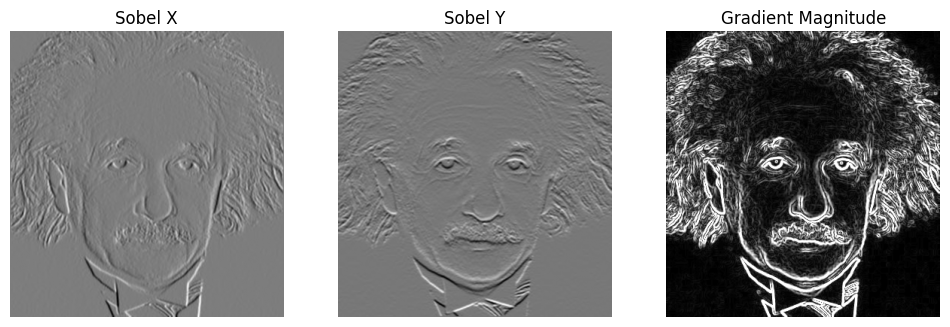

In [131]:
# plots
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(grad_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grad_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(magnitude, cmap='gray')
plt.title('Gradient Magnitude')
plt.axis('off')

plt.show()

In [132]:
def convolve2d(image, kernel):
    # Flip the kernel (convolution definition)
    kernel = np.flipud(np.fliplr(kernel))

    img_h, img_w = image.shape
    k_h, k_w = kernel.shape

    # Pad the image with zeros on all sides
    pad_h = k_h // 2
    pad_w = k_w // 2

    padded = np.pad(image, ((pad_h, pad_h), (pad_w, pad_w)), mode='constant', constant_values=0)

    # Prepare output array
    output = np.zeros_like(image, dtype=float)

    # Convolve kernel over image
    for i in range(img_h):
        for j in range(img_w):
            region = padded[i:i+k_h, j:j+k_w]
            output[i, j] = np.sum(region * kernel)

    return output

In [133]:
# Apply Sobel filters
grad_x = convolve2d(Q7_img, sobel_x)
grad_y = convolve2d(Q7_img, sobel_y)

In [134]:
# Compute gradient magnitude
magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Normalize to uint8 [0,255]
magnitude = np.clip(magnitude, 0, 255)
magnitude = magnitude / magnitude.max() * 255
magnitude = magnitude.astype(np.uint8)

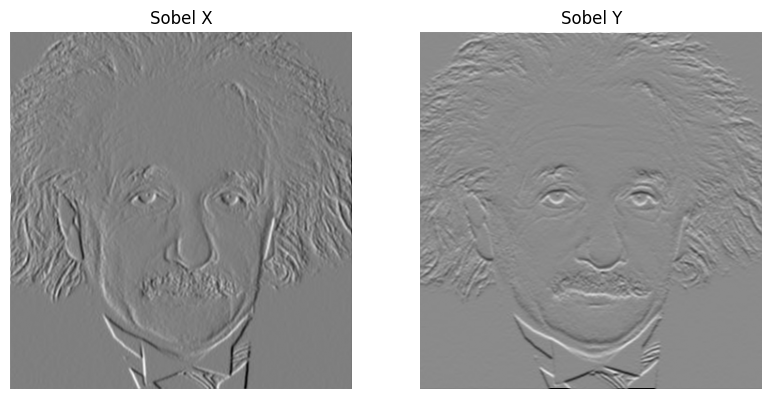

In [138]:
# Plot results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(grad_x, cmap='gray')
plt.title('Sobel X')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(grad_y, cmap='gray')
plt.title('Sobel Y')
plt.axis('off')

plt.show()

In [139]:
# Sobel filter separable components
sobel_x_vertical = np.array([[1], [2], [1]])
sobel_x_horizontal = np.array([[1, 0, -1]])

sobel_y_vertical = np.array([[1], [0], [-1]])
sobel_y_horizontal = np.array([[1, 2, 1]])

# Apply Sobel X separably
x_mid = cv.filter2D(Q7_img, cv.CV_64F, sobel_x_horizontal)
x_filtered_image = cv.filter2D(x_mid, cv.CV_64F, sobel_x_vertical)

# Apply Sobel Y separably
y_mid = cv.filter2D(Q7_img, cv.CV_64F, sobel_y_vertical)
y_filtered_image = cv.filter2D(y_mid, cv.CV_64F, sobel_y_horizontal)

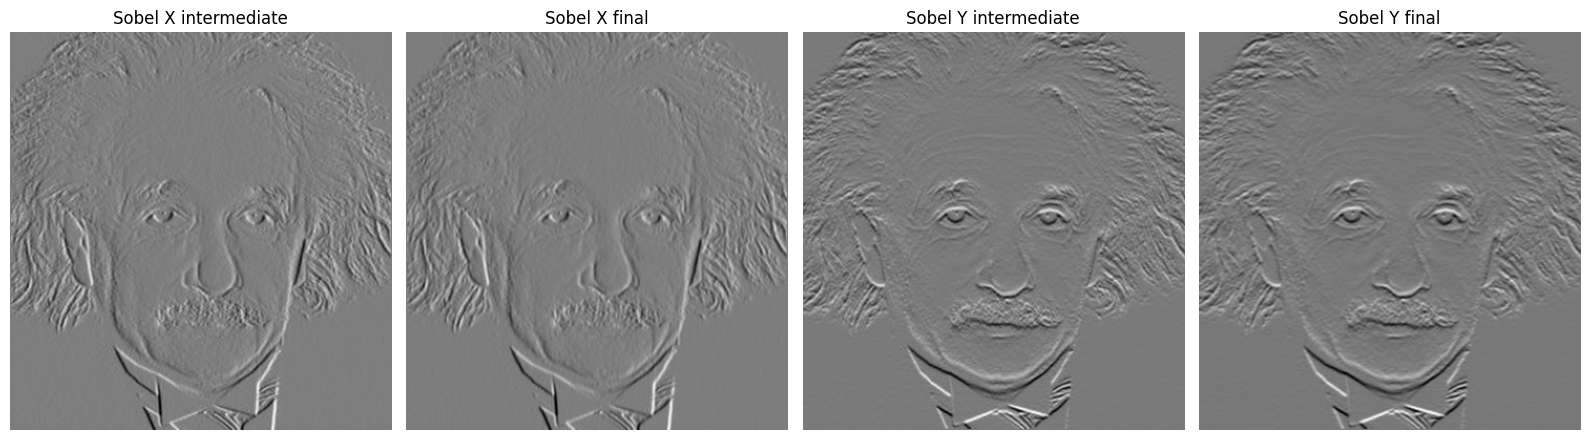

In [142]:
# Plotting
fig, ax = plt.subplots(1, 4, figsize=(16, 8))

ax[0].imshow(x_mid, cmap='gray')
ax[0].set_title('Sobel X intermediate')
ax[0].axis('off')

ax[1].imshow(x_filtered_image, cmap='gray')
ax[1].set_title('Sobel X final')
ax[1].axis('off')

ax[2].imshow(y_mid, cmap='gray')
ax[2].set_title('Sobel Y intermediate')
ax[2].axis('off')

ax[3].imshow(y_filtered_image, cmap='gray')
ax[3].set_title('Sobel Y final')
ax[3].axis('off')


plt.tight_layout()
plt.show()

##Question 8

In [144]:
def zoom(img, technique, scale=4):
    if not (0 < scale <= 10):
        raise ValueError("Scale must be in the range (0, 10].")
    if technique == 'nn':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_NEAREST)
    elif technique == 'bilinear':
        return cv.resize(img, None, fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)
    else:
        raise ValueError("Unsupported interpolation technique. Use 'nn' or 'bilinear'.")

def norm_SSD(img1, img2):
    if img1.shape != img2.shape:
        raise ValueError("Images must have the same dimensions")
    return np.sum((img1.astype(np.float64) - img2.astype(np.float64))**2) / img1.size


##Image 1

Normalized SSD for Nearest Neighbour:  136.26904899691357
Normalized SSD for Bilinear:  115.0919012024177


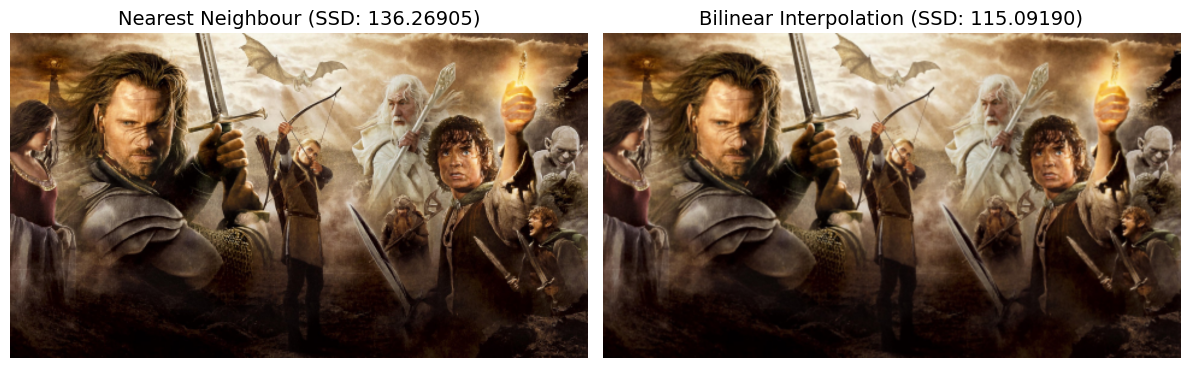

In [145]:
# Load images
im1 = cv.imread('/content/drive/MyDrive/EN3160/a1images/a1q5images/im01.png')
assert im1 is not None, "im01.png not found"

im1_small = cv.imread('/content/drive/MyDrive/EN3160/a1images/a1q5images/im01small.png')
assert im1_small is not None, "im01small.png not found"

scale_factor = im1.shape[1] / im1_small.shape[1]  # Calculate scale based on width ratio

# Zoom using nearest neighbor and bilinear interpolation
im1_zoomed_nn = zoom(im1_small, technique='nn', scale=scale_factor)
im1_zoomed_bilinear = zoom(im1_small, technique='bilinear', scale=scale_factor)

# Calculate Normalized SSD errors
nn_SSD = norm_SSD(im1, im1_zoomed_nn)
bilinear_SSD = norm_SSD(im1, im1_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].imshow(cv.cvtColor(im1_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=14)
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(im1_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinear Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=14)
axs[1].axis('off')

plt.tight_layout()
plt.show()

##Image 2

Normalized SSD for Nearest Neighbour:  26.446087384259258
Normalized SSD for Bilinear:  18.34591767939815


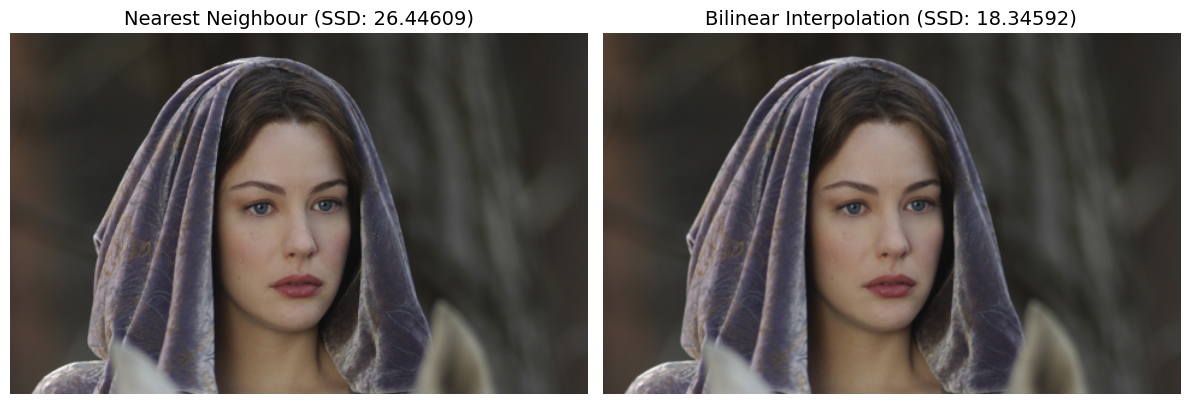

In [148]:
# Load images
im2 = cv.imread('/content/drive/MyDrive/EN3160/a1images/a1q5images/im02.png')
assert im1 is not None, "im02.png not found"

im2_small = cv.imread('/content/drive/MyDrive/EN3160/a1images/a1q5images/im02small.png')
assert im2_small is not None, "im02small.png not found"

scale_factor = im2.shape[1] / im2_small.shape[1]  # Calculate scale based on width ratio

# Zoom using nearest neighbor and bilinear interpolation
im2_zoomed_nn = zoom(im2_small, technique='nn', scale=scale_factor)
im2_zoomed_bilinear = zoom(im2_small, technique='bilinear', scale=scale_factor)

# Calculate Normalized SSD errors
nn_SSD = norm_SSD(im2, im2_zoomed_nn)
bilinear_SSD = norm_SSD(im2, im2_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].imshow(cv.cvtColor(im2_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=14)
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(im2_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinear Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=14)
axs[1].axis('off')

plt.tight_layout()
plt.show()

##Image 3

In [151]:
# Load images
im3 = cv.imread('/content/drive/MyDrive/EN3160/a1images/a1q5images/im03.png')
assert im3 is not None, "im03.png not found"

im3_small = cv.imread('/content/drive/MyDrive/EN3160/a1images/a1q5images/im03small.png')
assert im3_small is not None, "im03small.png not found"

scale_factor = im3.shape[1] / im3_small.shape[1]  # Calculate scale based on width ratio

# Zoom using nearest neighbor and bilinear interpolation
im3_zoomed_nn = zoom(im3_small, technique='nn', scale=scale_factor)
im3_zoomed_bilinear = zoom(im3_small, technique='bilinear', scale=scale_factor)

# Calculate Normalized SSD errors
nn_SSD = norm_SSD(im3, im3_zoomed_nn)
bilinear_SSD = norm_SSD(im3, im3_zoomed_bilinear)

print('Normalized SSD for Nearest Neighbour: ', nn_SSD)
print('Normalized SSD for Bilinear: ', bilinear_SSD)

# Plot results
fig, axs = plt.subplots(1, 2, figsize=(12, 8))

axs[0].imshow(cv.cvtColor(im3_zoomed_nn, cv.COLOR_BGR2RGB))
axs[0].set_title(f'Nearest Neighbour (SSD: {nn_SSD:.5f})', fontsize=14)
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(im3_zoomed_bilinear, cv.COLOR_BGR2RGB))
axs[1].set_title(f'Bilinear Interpolation (SSD: {bilinear_SSD:.5f})', fontsize=14)
axs[1].axis('off')

plt.tight_layout()
plt.show()

ValueError: Images must have the same dimensions

##Question 9

In [152]:
# Import Q9 image
Q9_img = cv.imread('/content/drive/MyDrive/EN3160/a1images/daisy.jpg')
assert Q9_img is not None

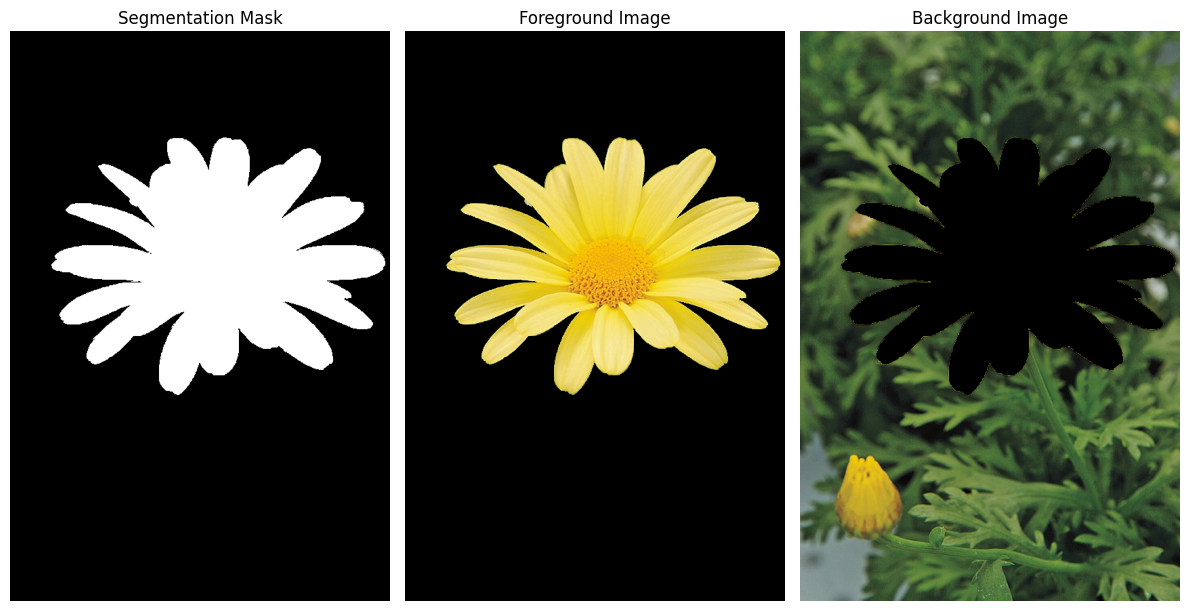

In [154]:
# Initialize mask and background/foreground models for GrabCut
mask = np.zeros(Q9_img.shape[:2], np.uint8)         # Mask initialized to zeros (same height & width as image)
bgdModel = np.zeros((1, 65), np.float64)           # Background model used internally by GrabCut
fgdModel = np.zeros((1, 65), np.float64)           # Foreground model used internally by GrabCut

# Define a rectangle around the foreground object (x, y, width, height)
rect = (50, 100, 550, 490)

# Run GrabCut algorithm with the rectangle as initialization
cv.grabCut(Q9_img, mask, rect, bgdModel, fgdModel, 5, cv.GC_INIT_WITH_RECT)

# Create binary mask where:
# Pixels marked as 'sure background' (0) or 'probable background' (2) set to 0,
# Pixels marked as 'sure foreground' (1) or 'probable foreground' (3) set to 1
mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')

# Extract foreground by multiplying mask with image channels
foreground = Q9_img * mask2[:, :, np.newaxis]      # Mask2 expanded to 3 channels

# Extract background by subtracting foreground from original image
background = cv.subtract(Q9_img, foreground)

# Display segmentation mask, foreground, and background
fig, axs = plt.subplots(1, 3, figsize=(12, 6))

axs[0].imshow(mask2, cmap='gray')
axs[0].set_title('Segmentation Mask')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
axs[1].set_title('Foreground Image')
axs[1].axis('off')

axs[2].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
axs[2].set_title('Background Image')
axs[2].axis('off')

plt.tight_layout()
plt.show()

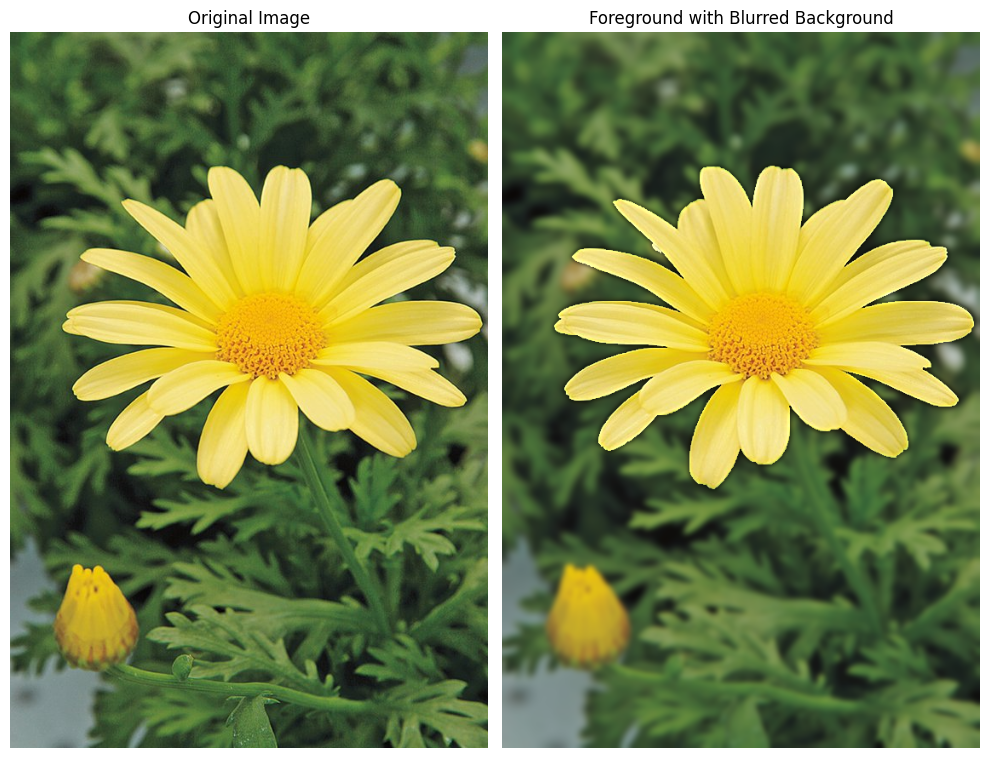

In [156]:
# Apply Gaussian blur to the background to create a smooth effect
blurred_background = cv.GaussianBlur(background, (25, 25), 3)

# Combine the sharp foreground with the blurred background
blurred = cv.add(foreground, blurred_background)

# Display original and final blended image
fig, axs = plt.subplots(1, 2, figsize=(10, 8))

axs[0].imshow(cv.cvtColor(Q9_img, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(blurred, cv.COLOR_BGR2RGB))
axs[1].set_title('Foreground with Blurred Background')
axs[1].axis('off')

plt.tight_layout()
plt.show()